# The CelebA dataset

This notebook should help to get familiar with the [CelebA](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset. It is expected to be executed within the root folder of the downloaded dataset. Note, images are assumed to be extracted already.

In [1]:
import numpy as np
import os
from collections import defaultdict
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.patches as patches
from PIL import Image
import sys

In [2]:
annotation = defaultdict(dict)

In [3]:
# All images with the same identity show the same person.
ident_file = 'Anno/identity_CelebA.txt'

with open(ident_file) as f:
    content = f.readlines()

for line in content:
    img_ident, ident = line.split()
    annotation[img_ident]['ident'] = ident

In [4]:
# What attributes do images have?
attr_file = 'Anno/list_attr_celeba.txt'

with open(attr_file) as f:
    num_imgs_line = f.readline()
    attr_names_line = f.readline()
    content = f.readlines()
    
num_imgs = int(num_imgs_line.strip())
assert(len(content) == num_imgs)

attr_names = attr_names_line.split()

for line in content:
    words = line.split()
    img_ident = words[0]
    attrs = [int(i) > 0 for i in words[1:]]
    assert(len(attrs) == len(attr_names))
    annotation[img_ident]['attrs'] = attrs

In [5]:
# What are the bounding boxes of the faces in the original images.
# Note, they don't match the aligned and cropped images, these images where extracted by an (to me) 
# unknown algorithm that rotated the images along the eyeline and then cropped them to a size of 218*178

bbox_file = 'Anno/list_bbox_celeba.txt'

with open(bbox_file) as f:
    num_imgs = int(f.readline().strip())
    # Skip comment line.
    f.readline()
    content = f.readlines()
    
assert(len(content) == num_imgs)

for line in content:
    words = line.split()
    img_ident = words[0]
    bbox = [int(i) for i in words[1:]]
    assert(len(bbox) == 4)
    annotation[img_ident]['bbox'] = bbox

[35, 69, 229, 317]


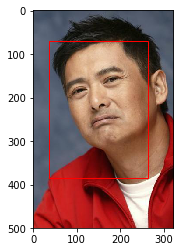

(218, 178, 3)


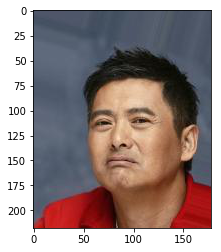

In [6]:
sample_img = random.choice(list(annotation.keys()))

orig_imgs = 'Img/img_celeba.7z'
imgs = 'Img/img_align_celeba'

fig, ax = plt.subplots(1,1)

img = Image.open(os.path.join(orig_imgs, sample_img))
#img = img.resize((218, 178), Image.BILINEAR)

ax.imshow(img)

bbox = annotation[sample_img]['bbox']
print(bbox)
rect = patches.Rectangle(bbox[:2], bbox[2], bbox[3], linewidth=1, edgecolor='r', facecolor='none')
ax.add_patch(rect)

plt.show()

img = mpimg.imread(os.path.join(imgs, sample_img))
print(np.shape(img))
plt.imshow(img)
plt.show()

In [7]:
# Read in the original landmarks.

landmarks_file = 'Anno/list_landmarks_celeba.txt'

with open(landmarks_file) as f:
    num_imgs = int(f.readline().strip())
    landmark_names = f.readline().split()
    content = f.readlines()
    
assert(len(landmark_names) % 2 == 0)
assert(len(content) == num_imgs)

lm_names = []
for i in range(0, len(landmark_names), 2):
    assert(landmark_names[i].endswith('_x') and landmark_names[i+1].endswith('_y'))
    lm_names.append(landmark_names[i][:-2])
print(lm_names)
    
for line in content:
    words = line.split()
    img_ident = words[0]
    locs = [int(i) for i in words[1:]]
    assert(len(locs) == len(landmark_names))
    
    lms = dict()

    for i in range(0, len(locs), 2):
        lms[lm_names[i//2]] = (locs[i], locs[i+1])
    
    annotation[img_ident]['orig_landmarks'] = lms

['lefteye', 'righteye', 'nose', 'leftmouth', 'rightmouth']


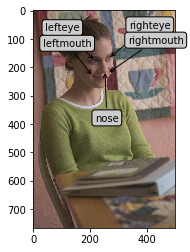

In [8]:
sample_img = random.choice(list(annotation.keys()))

orig_imgs = 'Img/img_celeba.7z'

fig, ax = plt.subplots(1,1)

img = mpimg.imread(os.path.join(orig_imgs, sample_img))

ax.imshow(img)

landmarks = annotation[sample_img]['orig_landmarks']
for k, v in landmarks.items():
    xytext = (-10, -50)
    if k.startswith('left'):
        xytext = (-50, 30)
    elif k.startswith('right'):
        xytext = (20, 30)
    
    ax.annotate(k,
        xy=v, xycoords='data',
        xytext=xytext, textcoords='offset points',
        arrowprops=dict(arrowstyle="->"),
        bbox=dict(boxstyle="round", fc="0.8"))

plt.show()

In [9]:
# Read in the landmarks from the aligned and cropped images.

landmarks_file = 'Anno/list_landmarks_align_celeba.txt'

with open(landmarks_file) as f:
    num_imgs = int(f.readline().strip())
    landmark_names = f.readline().split()
    content = f.readlines()
    
assert(len(landmark_names) % 2 == 0)
assert(len(content) == num_imgs)

lm_names = []
for i in range(0, len(landmark_names), 2):
    assert(landmark_names[i].endswith('_x') and landmark_names[i+1].endswith('_y'))
    lm_names.append(landmark_names[i][:-2])
print(lm_names)
    
for line in content:
    words = line.split()
    img_ident = words[0]
    locs = [int(i) for i in words[1:]]
    assert(len(locs) == len(landmark_names))
    
    lms = dict()

    for i in range(0, len(locs), 2):
        lms[lm_names[i//2]] = (locs[i], locs[i+1])
    
    annotation[img_ident]['landmarks'] = lms

['lefteye', 'righteye', 'nose', 'leftmouth', 'rightmouth']


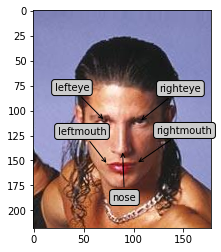

In [10]:
sample_img = random.choice(list(annotation.keys()))

use_png = True

imgs_path = 'Img/img_align_celeba'
img_name = sample_img

if use_png:
    imgs_path = 'Img/img_align_celeba_png.7z'
    img_name = os.path.splitext(sample_img)[0] + '.png'

fig, ax = plt.subplots(1,1)

img = mpimg.imread(os.path.join(imgs_path, img_name))

ax.imshow(img)

landmarks = annotation[sample_img]['landmarks']
for k, v in landmarks.items():
    xytext = (-10, -50)
    if k.startswith('left'):
        xytext = (-50, 30)
    elif k.startswith('right'):
        xytext = (20, 30)
    
    ax.annotate(k,
        xy=v, xycoords='data',
        xytext=xytext, textcoords='offset points',
        arrowprops=dict(arrowstyle="->"),
        bbox=dict(boxstyle="round", fc="0.8"))

plt.show()

In [11]:
# Load partitioning (what samples belong to train (0), test (2) and val (1) set?).
fn = 'Eval/list_eval_partition.txt'

with open(fn) as f:
    content = f.readlines()
    
counts = defaultdict(int)

for line in content:
    img_ident, partition = line.split()
    partition = int(partition)
    
    counts[partition] +=1
    
    annotation[img_ident]['partition'] = partition
    annotation[img_ident]['partition_name'] = 'train' if partition == 0 else 'val' if partition == 1 else 'test'
    
counts  

defaultdict(int, {0: 162770, 1: 19867, 2: 19962})

In [12]:
print('All meta information takes %.2f MB.' % (sys.getsizeof(annotation) / (1024 * 1024)))

All meta information takes 10.00 MB.


In [13]:
def check_imgs(root_path, is_png=False):
    failed = 0
    
    for img_fn in annotation.keys():
        if is_png:
            img_fn = os.path.splitext(img_fn)[0] + '.png'
        
        try:
            img = Image.open(os.path.join(root_path, img_fn))
        except:
            failed += 1
    
    print('Folder %s contains %d corrupted images.' % (root_path, failed))

orig_imgs = 'Img/img_celeba.7z'
imgs_jpg = 'Img/img_align_celeba'
imgs_png = 'Img/img_align_celeba_png.7z'

check_imgs(orig_imgs)
check_imgs(imgs_jpg)
check_imgs(imgs_png, True)

Folder Img/img_celeba.7z contains 0 corrupted images.
Folder Img/img_align_celeba contains 0 corrupted images.
Folder Img/img_align_celeba_png.7z contains 0 corrupted images.


In [14]:
print('The images read as uint8 would take up %.2f GB.' % (len(annotation) * 218 * 178 * 3 / (1024 * 1024 * 1024)))
# Note, that in order to process them through a network, we actually need floats.
# Thus, reading the whole dataset into memory is not a good idea.

## Load all images into memory.
#
#img_path = 'Img/img_align_celeba'
##img_path = 'Img/img_align_celeba_png.7z'
#
#imgs = np.empty((len(annotation), 218 * 178 * 3), np.uint8)
#
#for i, img_name in enumerate(os.listdir(img_path)):
#    img = mpimg.imread(os.path.join(img_path, img_name))
#    img = img.reshape((-1))
#    
#    imgs[i, :] = img
#    
#print('The images read into memory take %.2f GB.' % (sys.getsizeof(imgs) / (1024 * 1024 * 1024)))

The images read as uint8 would take up 21.97 GB.
